In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Linear Regression

In [3]:
np.random.seed(0)
m = 100
X = np.linspace(0, 10, m).reshape(m, 1)
y = X + np.random.randn(m, 1)

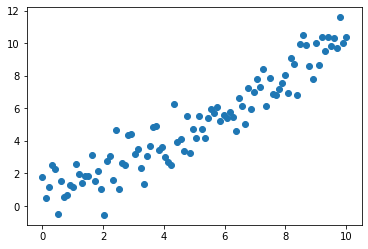

In [5]:
plt.scatter(X, y)

In [6]:
from sklearn.linear_model import LinearRegression

In [7]:
model = LinearRegression()
model.fit(X, y)
model.score(X, y)

0.8881140743377214

In [9]:
prediction = model.predict(X)
prediction

array([[0.20847145],
       [0.30647825],
       [0.40448505],
       [0.50249185],
       [0.60049865],
       [0.69850544],
       [0.79651224],
       [0.89451904],
       [0.99252584],
       [1.09053264],
       [1.18853944],
       [1.28654624],
       [1.38455304],
       [1.48255984],
       [1.58056664],
       [1.67857344],
       [1.77658024],
       [1.87458704],
       [1.97259384],
       [2.07060064],
       [2.16860743],
       [2.26661423],
       [2.36462103],
       [2.46262783],
       [2.56063463],
       [2.65864143],
       [2.75664823],
       [2.85465503],
       [2.95266183],
       [3.05066863],
       [3.14867543],
       [3.24668223],
       [3.34468903],
       [3.44269583],
       [3.54070263],
       [3.63870942],
       [3.73671622],
       [3.83472302],
       [3.93272982],
       [4.03073662],
       [4.12874342],
       [4.22675022],
       [4.32475702],
       [4.42276382],
       [4.52077062],
       [4.61877742],
       [4.71678422],
       [4.814

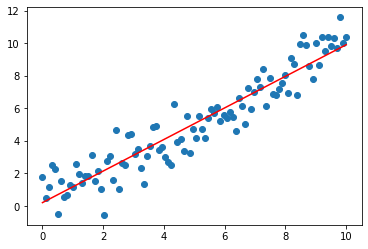

In [10]:
plt.scatter(X, y)
plt.plot(X, prediction, c='r')

In [1]:
from sklearn.datasets import load_iris

In [15]:
iris = load_iris()

X = iris.data
y = iris.target

print('X', X.shape)

X (150, 4)


In [3]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)
print('Train set:', X_train.shape)
print('Test set', X_test.shape)

Train set: (120, 4)
Test set (30, 4)


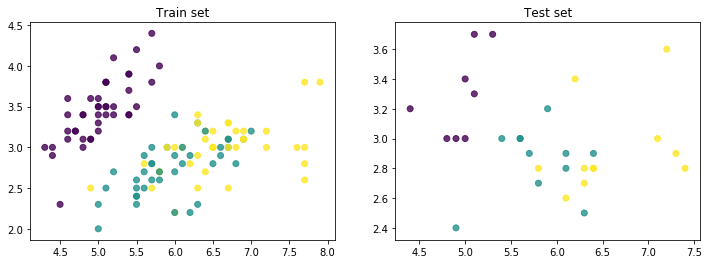

In [20]:
plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, alpha=0.8)
plt.title('Train set')
plt.subplot(122)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, alpha=0.8)
plt.title('Test set')
plt.show()

In [32]:
from sklearn.neighbors import KNeighborsClassifier

In [24]:
model = KNeighborsClassifier(n_neighbors=1)
model.fit(X_train, y_train)
print('Train score:', model.score(X_train, y_train))
print('Test score:', model.score(X_test, y_test))

Train score: 1.0
Test score: 0.9


In [25]:
from sklearn.model_selection import cross_val_score

In [26]:
cross_val_score(KNeighborsClassifier(), X_train, y_train, cv=5, scoring='accuracy')

array([1.        , 1.        , 1.        , 0.95833333, 0.95833333])

In [27]:
from sklearn.model_selection import validation_curve

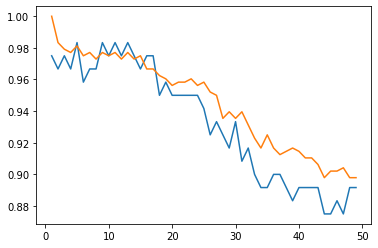

In [39]:
model = KNeighborsClassifier()
k = np.arange(1, 50)
train_score, val_score = validation_curve(model, X_train, y_train, 'n_neighbors', k, cv=5)

plt.plot(k, val_score.mean(axis=1))
plt.plot(k, train_score.mean(axis=1))

In [30]:
from sklearn.model_selection import GridSearchCV

In [33]:
param_grid = {'n_neighbors': np.arange(1, 20), 'metric': ['euclidean', 'manhattan']}

grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [34]:
grid.best_score_

0.9833333333333334

In [35]:
grid.best_params_

{'metric': 'euclidean', 'n_neighbors': 5}

In [36]:
model = grid.best_estimator_
model.score(X_test, y_test)

0.9333333333333333

In [40]:
from sklearn.model_selection import learning_curve

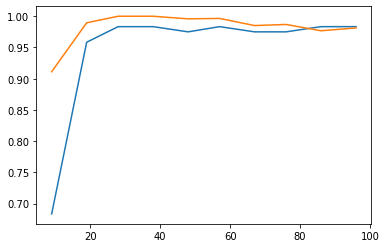

In [42]:
N, train_score, val_score = learning_curve(model, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)
plt.plot(N, val_score.mean(axis=1))
plt.plot(N, train_score.mean(axis=1))